#FUNDAMENTOS DE DATA SCIENCE
## Ana Lorena Navas Ruiz
## Fecha: 14/04/2025

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Cargar el dataset
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# 1. Preprocesamiento de datos


In [ ]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


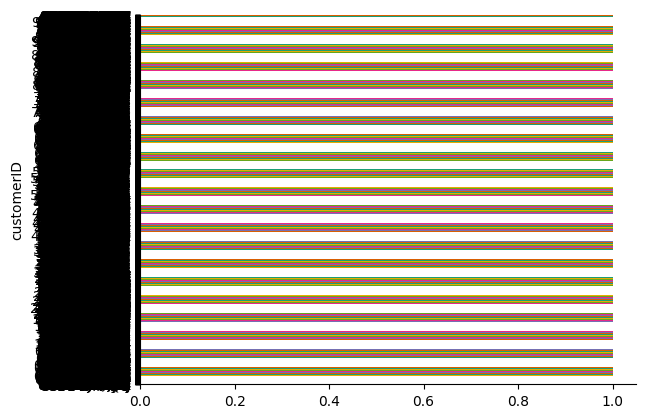

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming you want to use the 'df' DataFrame loaded earlier:
df.groupby('customerID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


from matplotlib import pyplot as plt
_df_0['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='SeniorCitizen', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Tenure'].plot(kind='line', figsize=(8, 4), title='Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# cuenta la cantidad de datos faltantes
df.isna().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
import pandas as pd

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TelecomCustomerChurn.csv')

# 1. Datos duplicados:
duplicados = df[df.duplicated()]
print(f"Número de filas duplicadas: {duplicados.shape[0]}")
# Para ver las filas duplicadas:
# print(duplicados)

# 2. Inconsistencias:
# Ejemplo: Buscar inconsistencias en la columna 'gender' (reemplaza con el nombre correcto)
# Asegúrate de que el nombre de la columna coincida con el de tu dataset
inconsistencias_genero = df[~df['Gender'].isin(['Male', 'Female'])]  # Changed 'gender' to 'Gender'
print(f"Inconsistencias en 'gender': {inconsistencias_genero.shape[0]}")
# print(inconsistencias_genero)  # Ver las filas con inconsistencias

# Puedes adaptar este enfoque para otras columnas según tus necesidades.

# 3. Calidad de datos:
# - Valores faltantes:
valores_faltantes = df.isnull().sum()
print("\nValores faltantes por columna:")
print(valores_faltantes)

# - Estadísticas descriptivas:
estadisticas = df.describe(include='all')  # Incluir todas las columnas
print("\nEstadísticas descriptivas:")
print(estadisticas)

Número de filas duplicadas: 0
Inconsistencias en 'gender': 0

Valores faltantes por columna:
customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Estadísticas descriptivas:
        customerID Gender  SeniorCitizen Partner Dependents       Tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    Na

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [ ]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # sparse=False for compatibility with TensorFlow
])

In [ ]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# define y and X
y = df['Churn']
X = df.drop(['customerID','Churn'],axis=1)

In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y_classification = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Para clasificación
y_regression = df['TotalCharges'] # Ejemplo de regresión: predecir TotalCharges (ajusta según tu objetivo)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [ ]:
# Update numerical_features and categorical_features to exclude 'customerID'
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Re-create the preprocessor with the updated features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Convertir a arrays de NumPy para TensorFlow
# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# X_train_processed and X_test_processed are already NumPy arrays
# because sparse=False was set in the OneHotEncoder.
# No need to call toarray()

X_train_nn = X_train_processed
X_test_nn = X_test_processed

# 2. Modelos de Regresión


In [ ]:
print("\n--- Modelos de Regresión (Prediciendo TotalCharges) ---")


--- Modelos de Regresión (Prediciendo TotalCharges) ---


In [ ]:
# Replace empty strings in 'TotalCharges' with 0 and convert to numeric
y_train_reg = pd.to_numeric(y_train_reg.replace(' ', '0', regex=True))
y_test_reg = pd.to_numeric(y_test_reg.replace(' ', '0', regex=True))

In [ ]:
# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# X_train_processed and X_test_processed are already NumPy arrays
# because sparse=False was set in the OneHotEncoder.
# No need to call toarray()

X_train_nn = X_train_processed
X_test_nn = X_test_processed

# For regression:
X_train_processed_reg = preprocessor.fit_transform(X_train_reg) # Fit and transform for regression
X_test_processed_reg = preprocessor.transform(X_test_reg) # Transform for regression

# 3. Modelos de Clasificación (Prediciendo Churn)

In [ ]:
print("\n--- Modelos de Clasificación (Prediciendo Churn) ---")


--- Modelos de Clasificación (Prediciendo Churn) ---


In [ ]:
# Regresión Logística
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_processed, y_train_clf)
y_pred_lr_clf = logistic_regression_model.predict(X_test_processed)
print("Regresión Logística - Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_lr_clf))
print("Regresión Logística - Matriz de Confusión:")
print(confusion_matrix(y_test_clf, y_pred_lr_clf))

Regresión Logística - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Regresión Logística - Matriz de Confusión:
[[937  99]
 [151 222]]


In [ ]:
# Árbol de Decisión para Clasificación
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_processed, y_train_clf)
y_pred_dt_clf = decision_tree_classifier.predict(X_test_processed)
print("\nÁrbol de Decisión (Clasificación) - Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_dt_clf))
print("Árbol de Decisión (Clasificación) - Matriz de Confusión:")
print(confusion_matrix(y_test_clf, y_pred_dt_clf))


Árbol de Decisión (Clasificación) - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.58      0.47      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

Árbol de Decisión (Clasificación) - Matriz de Confusión:
[[906 130]
 [196 177]]


In [ ]:
# Random Forest para Clasificación
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_processed, y_train_clf)
y_pred_rf_clf = random_forest_classifier.predict(X_test_processed)
print("\nRandom Forest (Clasificación) - Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_rf_clf))
print("Random Forest (Clasificación) - Matriz de Confusión:")
print(confusion_matrix(y_test_clf, y_pred_rf_clf))


Random Forest (Clasificación) - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Random Forest (Clasificación) - Matriz de Confusión:
[[944  92]
 [195 178]]


# 4. Modelo de Red Neuronal (Clasificación)

In [ ]:
print("\n--- Modelo de Red Neuronal (Clasificación) ---")


--- Modelo de Red Neuronal (Clasificación) ---


In [ ]:
# Definir la arquitectura del modelo
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid') # Salida binaria para clasificación
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilar el modelo
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
history = nn_model.fit(X_train_nn, y_train_clf, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

KeyboardInterrupt: 

In [ ]:
# Evaluar el modelo
loss, accuracy = nn_model.evaluate(X_test_nn, y_test_clf, verbose=0)
print(f"Red Neuronal - Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}")

Red Neuronal - Pérdida: 0.4046, Precisión: 0.8148


In [ ]:
# Hacer predicciones
y_pred_nn_prob = nn_model.predict(X_test_nn)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

print("\nRed Neuronal - Reporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_nn))
print("Red Neuronal - Matriz de Confusión:")
print(confusion_matrix(y_test_clf, y_pred_nn))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Red Neuronal - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1036
           1       0.66      0.62      0.64       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.76      1409
weighted avg       0.81      0.81      0.81      1409

Red Neuronal - Matriz de Confusión:
[[917 119]
 [142 231]]


#GRAFICOS

In [ ]:
#Se importan las librerias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor # Make sure this is imported
from sklearn.ensemble import RandomForestRegressor # Make sure this is imported

# 2. Gráficos para modelos de Regresión:
Gráfico de dispersión (Valores reales vs. predicciones):

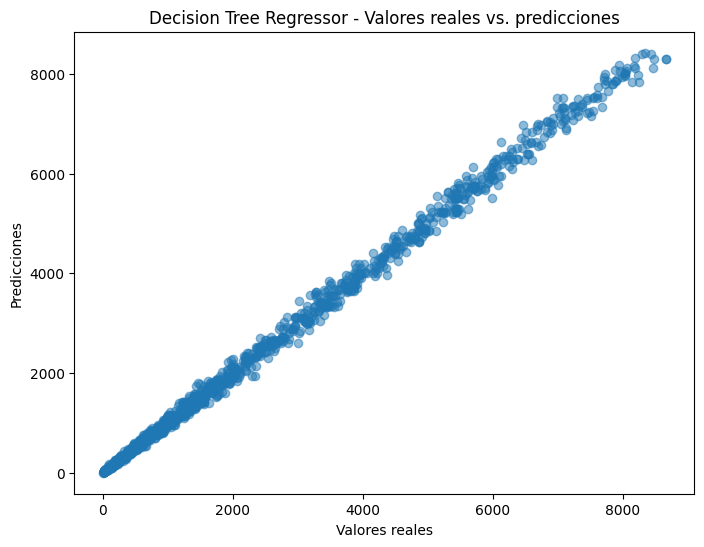

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor # Make sure this is imported

# Train and predict using Decision Tree Regressor:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_processed_reg, y_train_reg) # Train the model
y_pred_dt_reg = decision_tree_regressor.predict(X_test_processed_reg) # Get predictions

# Now you can create the plot:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_dt_reg, alpha=0.5)  # Para Decision Tree Regressor
plt.title('Decision Tree Regressor - Valores reales vs. predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

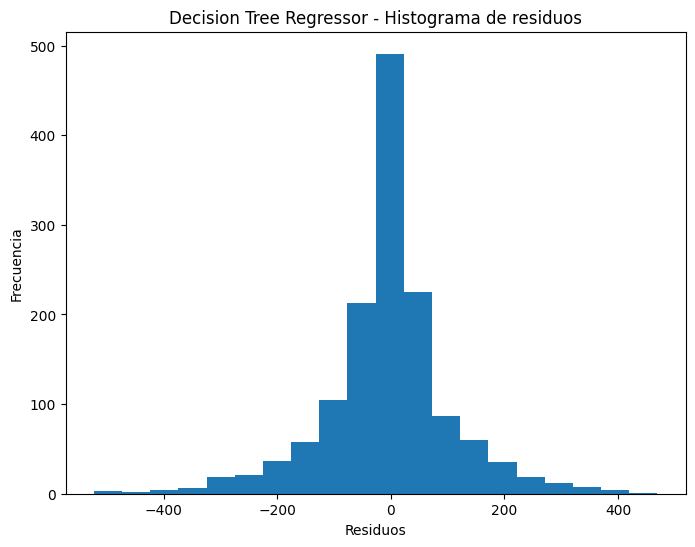

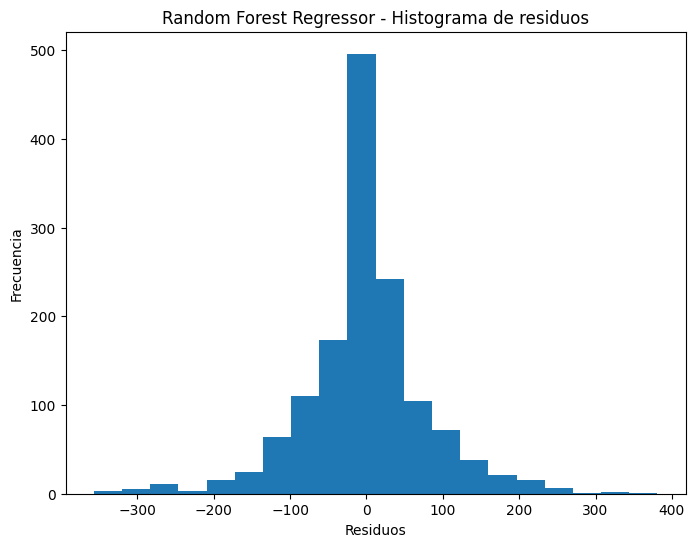

In [ ]:
residuals_dt_reg = y_test_reg - y_pred_dt_reg
plt.figure(figsize=(8, 6))
plt.hist(residuals_dt_reg, bins=20)
plt.title('Decision Tree Regressor - Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Repetir para Random Forest Regressor:
residuals_rf_reg = y_test_reg - y_pred_rf_reg
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf_reg, bins=20)
plt.title('Random Forest Regressor - Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

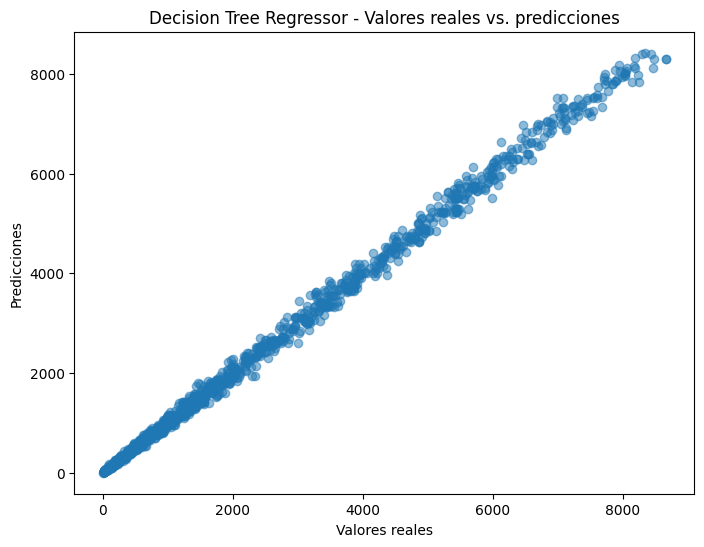

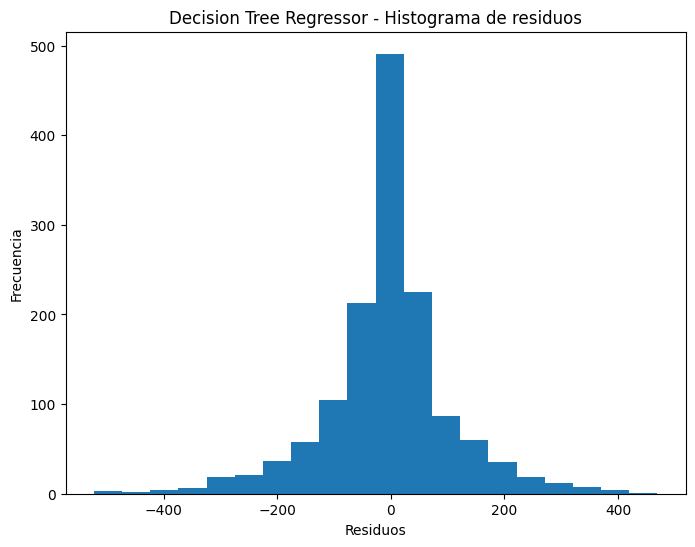

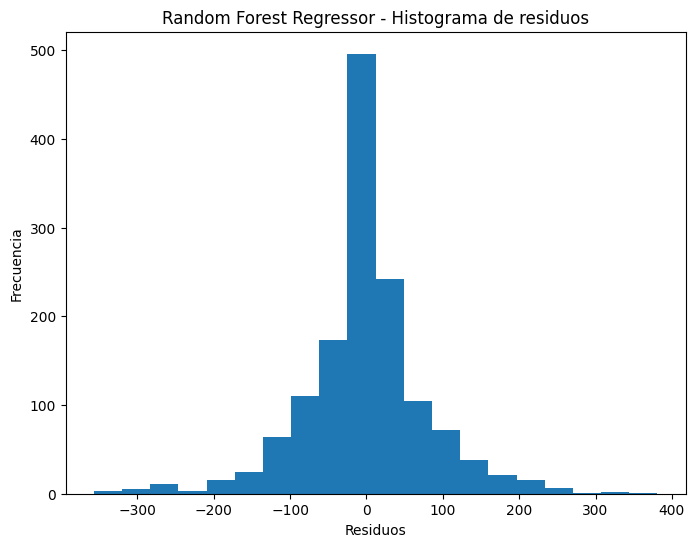

In [ ]:
# Train and predict using Decision Tree Regressor:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_processed_reg, y_train_reg) # Train the model
y_pred_dt_reg = decision_tree_regressor.predict(X_test_processed_reg) # Get predictions

# Now you can create the plot for Decision Tree Regressor:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_dt_reg, alpha=0.5)  # Para Decision Tree Regressor
plt.title('Decision Tree Regressor - Valores reales vs. predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

residuals_dt_reg = y_test_reg - y_pred_dt_reg
plt.figure(figsize=(8, 6))
plt.hist(residuals_dt_reg, bins=20)
plt.title('Decision Tree Regressor - Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Train and predict using Random Forest Regressor:
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_processed_reg, y_train_reg)
y_pred_rf_reg = random_forest_regressor.predict(X_test_processed_reg)

# Now you can repeat for Random Forest Regressor:
residuals_rf_reg = y_test_reg - y_pred_rf_reg
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf_reg, bins=20)
plt.title('Random Forest Regressor - Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

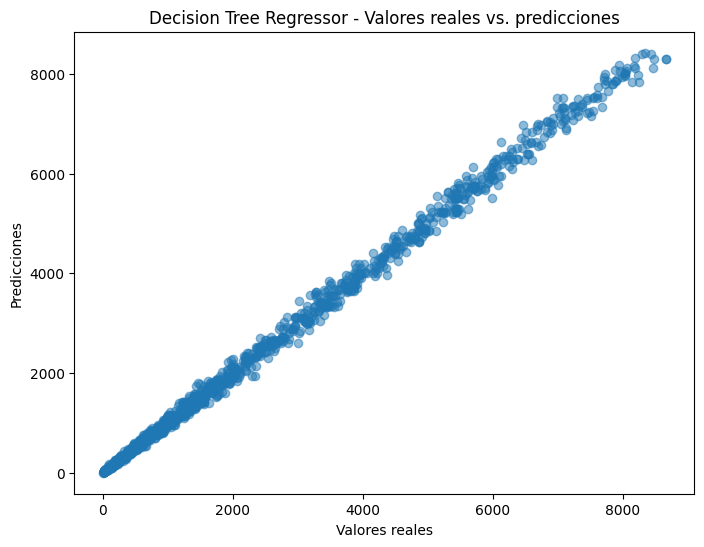

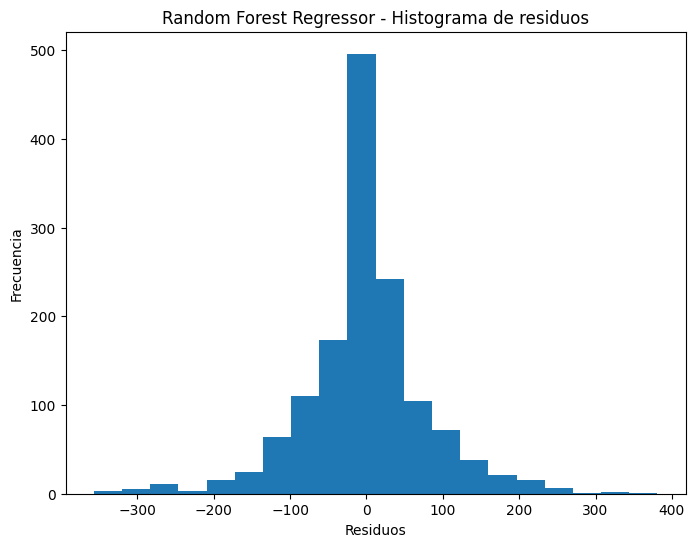

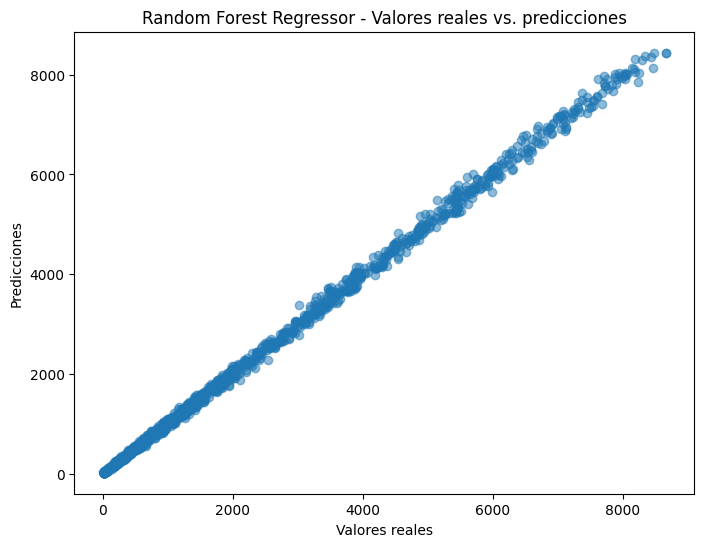

In [ ]:
# Train and predict using Decision Tree Regressor:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_processed_reg, y_train_reg) # Train the model
y_pred_dt_reg = decision_tree_regressor.predict(X_test_processed_reg) # Get predictions

# Now you can create the plot for Decision Tree Regressor:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_dt_reg, alpha=0.5)  # Para Decision Tree Regressor
plt.title('Decision Tree Regressor - Valores reales vs. predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()


# residuals_dt_reg = y_test_reg - y_pred_dt_reg
# plt.figure(figsize=(8, 6))
# plt.hist(residuals_dt_reg, bins=20)
# plt.title('Decision Tree Regressor - Histograma de residuos')
# plt.xlabel('Residuos')
# plt.ylabel('Frecuencia')
# plt.show()

# Train and predict using Random Forest Regressor:
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train_processed_reg, y_train_reg)
y_pred_rf_reg = random_forest_regressor.predict(X_test_processed_reg)

# Now you can repeat for Random Forest Regressor:
residuals_rf_reg = y_test_reg - y_pred_rf_reg
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf_reg, bins=20)
plt.title('Random Forest Regressor - Histograma de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.5)  # Para Random Forest Regressor
plt.title('Random Forest Regressor - Valores reales vs. predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()

# Histograma de residuos:

# 3. Gráficos para modelos de Clasificación:
Matriz de confusión:



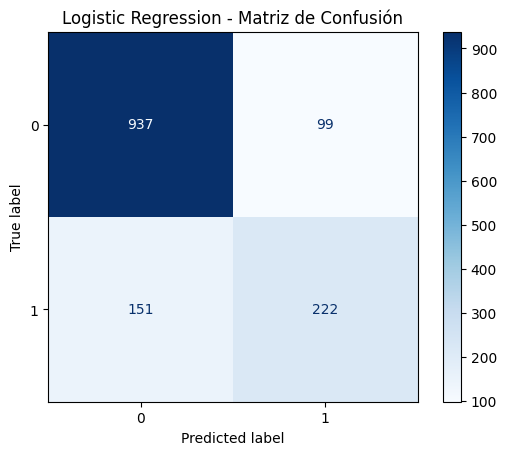

In [ ]:
# Import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión para Logistic Regression
cm_lr = confusion_matrix(y_test_clf, y_pred_lr_clf)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression - Matriz de Confusión')
plt.show()

# Repetir para Decision Tree y Random Forest

Curva ROC:

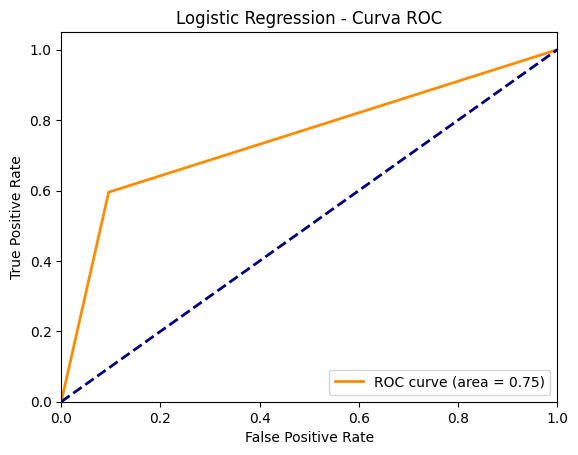

In [ ]:
from sklearn.metrics import roc_curve, auc

# Para Logistic Regression:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_clf, y_pred_lr_clf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Repetir para Decision Tree y Random Forest

# 4. Gráficos para la Red Neuronal:

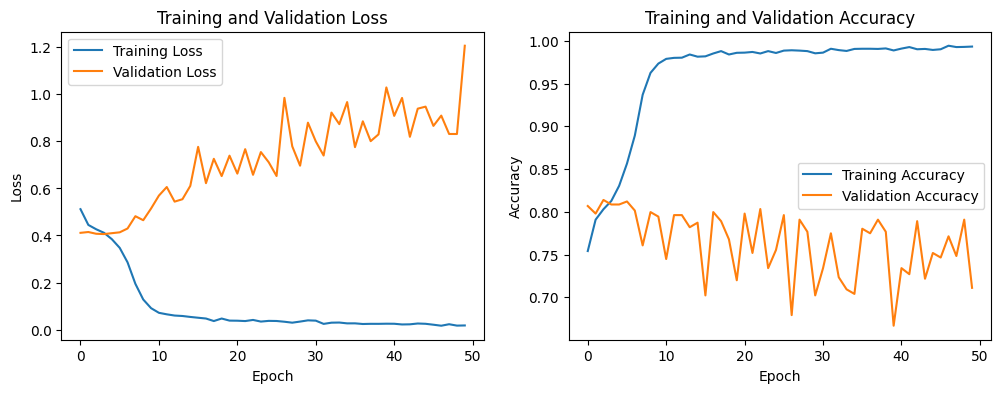

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()